In [19]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score
from sklearn.tree import DecisionTreeClassifier ##sklearn决策树算法
from Decisiontree_classify import DecisionTreeClassify  ##自己写的决策树算法
import utils

# 心脏病数据集二分类预测

In [20]:
data_2 = pd.read_csv('data/heart.csv')
cols = list(data_2.columns)
y = data_2.target
x = data_2.drop('target',axis=1)
X = x.values
y = y.values
X_train_2,X_test_2,y_train_2,y_test_2 = train_test_split(X,y,test_size=0.2,random_state=42)
My_model_2 = DecisionTreeClassify(Post_prune=False)
sklearn_model= DecisionTreeClassifier()
sklearn_model.fit(X_train_2,y_train_2)
My_model_2.fit(X_train=X_train_2,y_train=y_train_2)
y_pre_sklearn = sklearn_model.predict(X_test_2)
y_pre_2 = My_model_2.predict(X_test=X_test_2)

自编决策树算法上
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205

0.9853658536585366


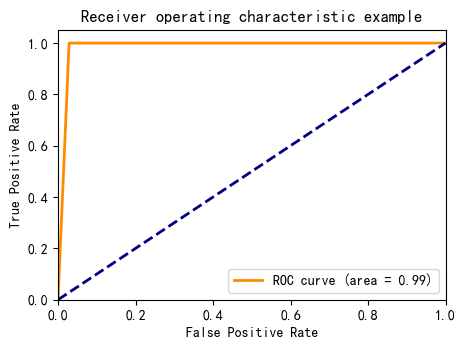

sklearn决策树算法
              precision    recall  f1-score   support

           0       1.00      0.97      0.99       105
           1       0.97      1.00      0.99       100

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205

0.9853658536585366


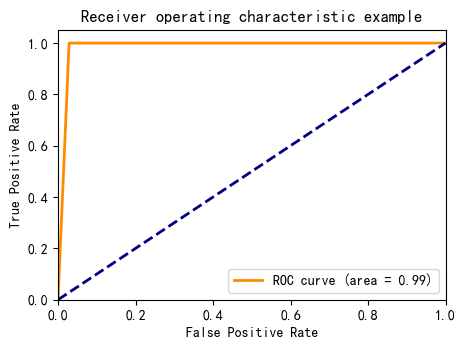

In [21]:
print('自编决策树算法上')
print(classification_report(y_true=y_test_2,y_pred=y_pre_2))   
print(accuracy_score(y_pre_2,y_test_2))
utils.roc_plot(y_pre_2,y_test_2)
###
print('sklearn决策树算法')
print(classification_report(y_pre_sklearn,y_test_2))
print(accuracy_score(y_pre_sklearn,y_test_2))
utils.roc_plot(y_pre_sklearn,y_test_2)

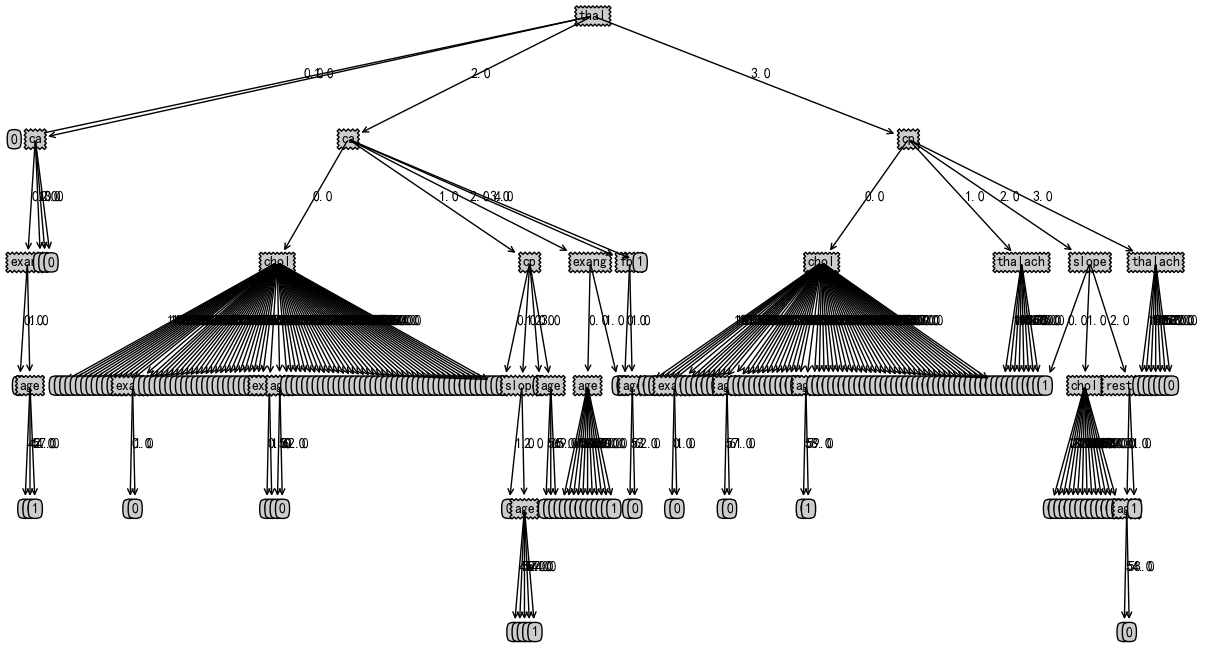

In [22]:
tree2 = My_model_2.C45_CreateTree(X=X_train_2,y=y_train_2,feature_names=cols[:-1])
utils.createPlot(tree2)